In [3]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys
!hostname

/mnt/home/bbhattarai/.local/lib/python3.7/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

pcn-5-41


In [1]:
datapath="/mnt/home/bbhattarai/B3-N/"
#freq_datapath="/mnt/home/bbhattarai/freq_data/"

In [4]:
angle_datapath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/"
datafilename="0_to_1048_B3-N_fft_barangles_combined_degrees.ang"
ang_stored = open(angle_datapath+datafilename,'rb')
all_bangles=pickle.load(ang_stored)
print(len(all_bangles))

1048


In [5]:
times=np.genfromtxt(datapath+'times.txt',dtype='str')
#print(len(times))
time=list()
for i in range(1048): #goto len(times) if you want to seek for all times that are calculated so far
    t=float(times[i][11:-2])/1000 # in Gyr
    time.append(t)
#plt.plot(all_bangles)
time=np.array(time)
time=time*9.778145
print(len(time))

1048


# Plotting bar angle (in radians) vs time

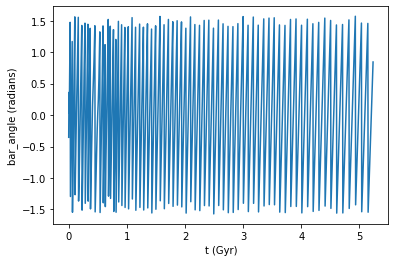

In [6]:
fig1=plt.figure()
ax=fig1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,bangle_radians)
plotname="bar_angle_vs_time.jpg"
#fig1.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()

# plotting in degrees

[-20.23611481  20.67285062   1.58616052 ...  32.3058355   40.34403405
  48.34510631]


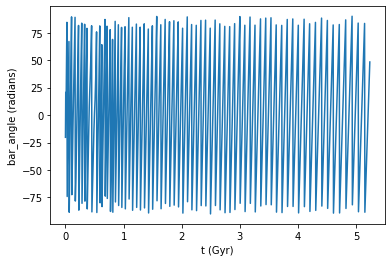

In [7]:
fig3=plt.figure()
ax=fig3.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
#bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,all_bangles)
plotname="bar_angle_vs_time.jpg"
#fig3.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()
print(all_bangles)

# Calculating pattern speed using numpy functions

[ 40.90896542 -19.0866901   33.09655092 ...   8.01992009   8.03819855
   8.00107227]
Plot generated and saved to file:  da_dt_vs_time.jpg


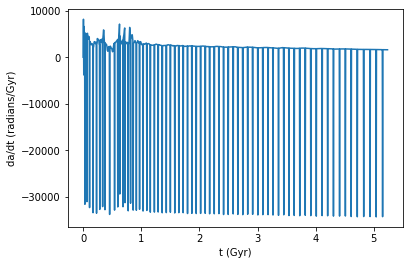

In [8]:
d_angle=np.diff(all_bangles)
print(d_angle)
dt=np.diff(time)
da_dt=d_angle/dt
zero=np.array([0])
da_dt_z=np.concatenate((zero,da_dt))
#print(da_dt)
#print(d_angle)

fig2=plt.figure()
ax=fig2.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,da_dt_z)
plotname="da_dt_vs_time.jpg"
#fig2.savefig(plotpath+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()
plt.show()

# Calculating da_dt numerically


# Converting all angles to positive

In [9]:
#converted all angles to positive
a=np.array(all_bangles)
for i in range(len(a)):
    if (a[i]<0):
        a[i]=360+a[i]
print(a)
t=time

[339.76388519  20.67285062   1.58616052 ...  32.3058355   40.34403405
  48.34510631]


20.672851 - 339.763885 = -319.091035
da <0 found
da is now 40.90896542117696
1.586161 - 20.672851 = -19.086690
da <0 found
da is now 340.91330990174646
d_a > 180 found
da is now:  160.91330990174646
34.682711 - 1.586161 = 33.096551
57.645343 - 34.682711 = 22.962631
84.442663 - 57.645343 = 26.797321
285.878560 - 84.442663 = 201.435897
d_a > 180 found
da is now:  21.435897343118995
310.545307 - 285.878560 = 24.666746
332.331773 - 310.545307 = 21.786466
353.918805 - 332.331773 = 21.587032
16.937364 - 353.918805 = -336.981441
da <0 found
da is now 23.018559167342758
41.829168 - 16.937364 = 24.891804
66.984975 - 41.829168 = 25.155808
271.555922 - 66.984975 = 204.570946
d_a > 180 found
da is now:  24.570946182300275
297.317895 - 271.555922 = 25.761973
322.932355 - 297.317895 = 25.614461
345.786135 - 322.932355 = 22.853779
5.339125 - 345.786135 = -340.447010
da <0 found
da is now 19.552990104482127
24.881465 - 5.339125 = 19.542341
47.273938 - 24.881465 = 22.392473
68.205230 - 47.273938 = 20.9

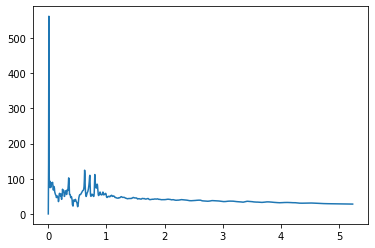

In [10]:
dadt=list()
da=list()
for i in range(1,len(t),1):
    #d=(a[i-1]-a[i])/(t[i-1]-t[i])
    d_a=(a[i]-a[i-1])
    print("%f - %f = %f"%(a[i],a[i-1],d_a))
    d_t=(t[i]-t[i-1])
    if d_a<0:
        print("da <0 found")
        d_a=a[i]+(360-a[i-1])  #if change in angle is negative, it is due to crossing the origin
        print("da is now",d_a)
    if d_a>180:                #if change in angle is greater than 180, the change in angle value we have is flipped by 180
        print("d_a > 180 found")
        d_a=d_a-180
        print("da is now: ",d_a)    
    da.append(d_a)
    #print(d_a)
    d_a_rad=np.deg2rad(d_a)
    d=d_a_rad/d_t
    dadt.append(d)

dadt=np.array(dadt)

zero=np.array([0])
dadtz=np.concatenate((zero,dadt))
#print(len(dadt))
#print(dadt)
plt.plot(time,dadtz)

# Fixing angles

28.04440080528545
Plot generated and saved to file:  da_dt_vs_time_B4_fft_method.jpg


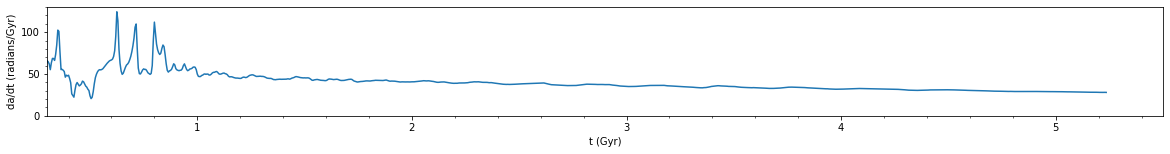

In [11]:
#import matplotlib
#from matplotlib.ticker import FuncFormatter, MultipleLocator
fig4=plt.figure(figsize=(20,2))
ax=fig4.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
#ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
#ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
ax.plot(time,dadtz)
ax.set_ylim(0,130)
ax.set_xlim(0.3,5.5)
#ax.axvline(x=1,c='red')
#ax.axvline(x=5,c='red')
last=dadtz[len(dadtz)-5]
#ax.axhline(y=last,c='blue')
ax.minorticks_on()
print(last)
plotname="da_dt_vs_time_B4_fft_method.jpg"
print("Plot generated and saved to file: ",plotname)
#fig4.savefig(plotname,bbox_inches="tight",dpi=300)
#plt.tight_layout()
plt.show()

#37-40 km/s/kpc

# Saving the pattern speed (frequency) of the bar in pickle file

In [12]:

datafilename="B3-N_saved_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/"
dadtz_kms_kpc=dadtz*3.08567758/3.15576
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(dadtz_kms_kpc, output)



1048
[  0.         139.44919381 549.58964368 ...  27.40227526  27.41642253
  27.33787647]


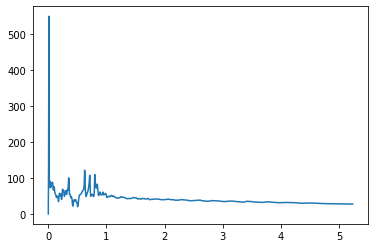

In [13]:
datafilename="B3-N_saved_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/"
ps_stored = open(save_datapath+datafilename,'rb')
ps=pickle.load(ps_stored)
print(len(ps))
print(ps)

plt.plot(time,ps)

In [14]:
print(time)

[0.00000000e+00 5.00641024e-03 1.00030423e-02 ... 5.22505250e+00
 5.23005597e+00 5.23505065e+00]
